IT326 Project || Section: 71680 
------------------------------------------------------------------------------
Members names and IDs:
Lujain Alhusan || 444200785
Noura Alzomai || 444200503 
Hadeel althunyan || 442200483 
Lama Alkhathlan || 444200844 
Walaa Saif Aleslam || 444200088 
------------------------------------------------------------------------------
Project Motivation: 
We chose to work with this dataset because it is clear and understandable. Our focus is on predicting diabetes, given the rising prevalence of this disease globally. Early diagnosis is essential for preventing the serious complications associated with diabetes. 
------------------------------------------------------------------------------
The Goal of collecting this dataset:
Our goal is to create a machine-learning model that predicts an individual's risk of developing diabetes by utilizing both clustering and classification approaches. For classification our aim is to train the model to identify people who are at risk of getting diabetes and those who are not, using a wide range of health-related attributes. And regards to clustering, our model will be able to investigate the underlying patterns in the data, recognize discrete groups of people with comparable risk profiles, and establish a collection of clusters for these people, which will then be utilized to predict the outcomes for new people.
------------------------------------------------------------------------------
Dataset URL: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes 
------------------------------------------------------------------------------
Dataset Info:
Number of objects: 2769 
Number of attributes: 10 
Class label: Diabetic or not 
------------------------------------------------------------------------------
Types of Attributes:
1)	Id: Nominal
2)	Pregnancies: Numeric ratio integer
3)	Glucose: Numeric interval integer
4)	BloodPressure: Numeric interval integer
5)	SkinThickness: Numeric ratio integer
6)	Insulin: Numeric ratio integer  
7)	BMI: Numeric ratio float  
8)	DiabetesPedigreeFunction: Numeric interval float  
9)	Age: Numeric ratio integer  
10)	Outcome: Nominal (Binary)
------------------------------------------------------------------------------
Columns Description: 
Id: Unique identifier for each data entry.
Pregnancies: Number of times pregnant.
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skinfold thickness (mm). 
Insulin: 2-Hour serum insulin (mu U/ml). 
BMI: Body mass index (weight in kg / height in m^2). 
DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes. 
Age: Age in years. 
Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes. 
------------------------------------------------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
os.getcwd()

'/workspaces/IT326-PROJECT'

In [3]:
diabetes = pd.read_csv('/workspaces/IT326-PROJECT/Dataset/Healthcare Diabetes.csv')
df= pd.DataFrame(diabetes)

Summmry of dataset and statical summaries:

In [4]:
#samples of dataset:
print(df.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
overall_variance=df.var()
print("Overall Variance:\n",overall_variance)

Overall Variance:
 Id                          638716.000000
Pregnancies                     11.047653
Glucose                       1026.337861
BloodPressure                  369.848213
SkinThickness                  257.910614
Insulin                      12611.724151
BMI                             65.223831
DiabetesPedigreeFunction         0.106060
Age                            138.703146
Outcome                          0.225724
dtype: float64


In [8]:
Missing_Values = df.isna().sum()
print(Missing_Values)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Numeric columns , after removing ID and Outcome:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


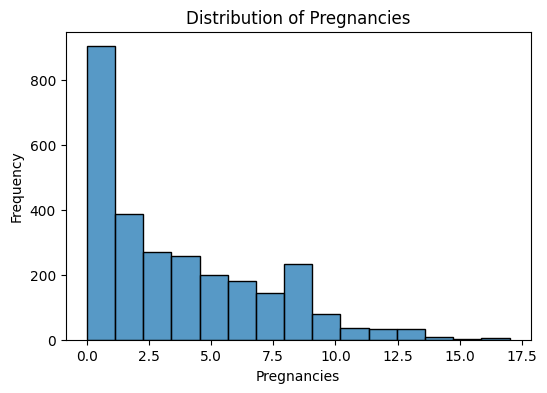

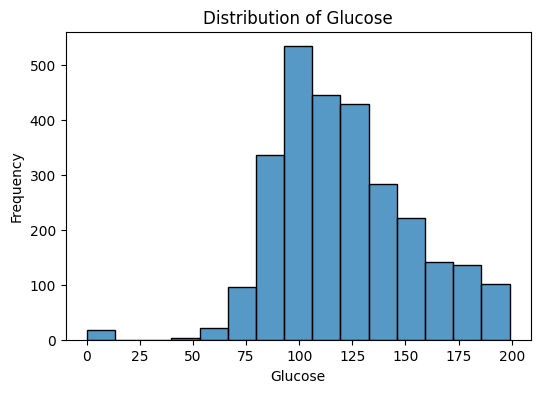

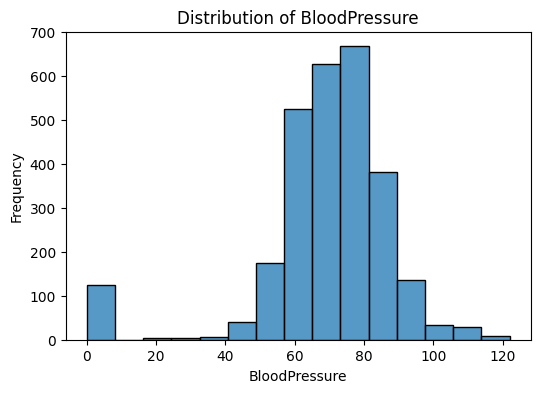

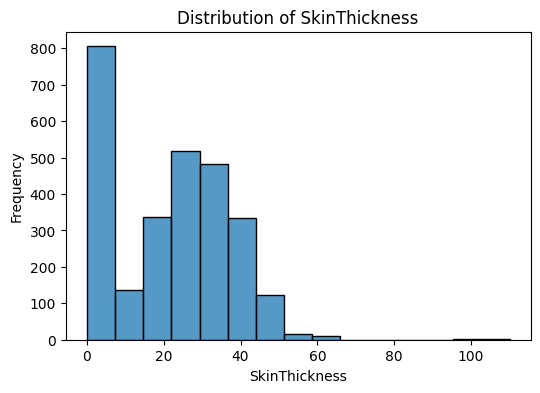

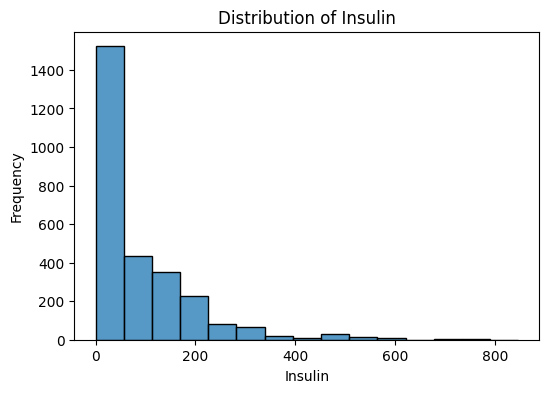

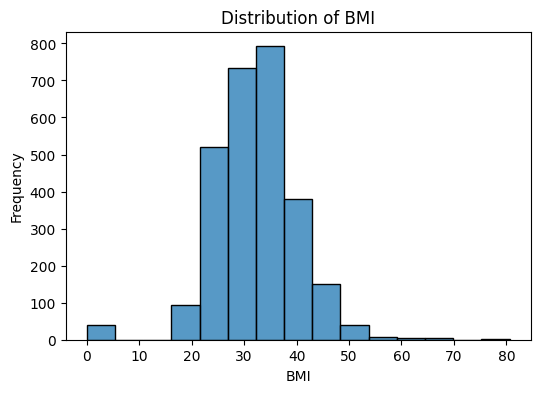

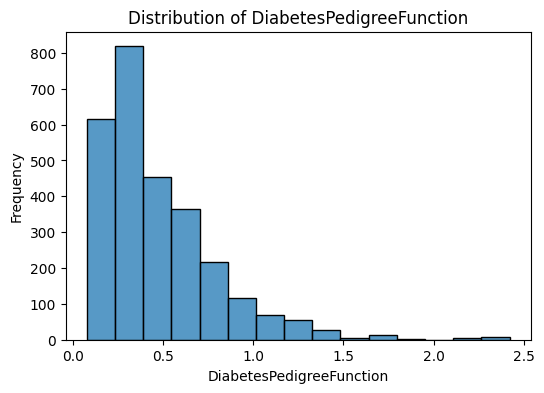

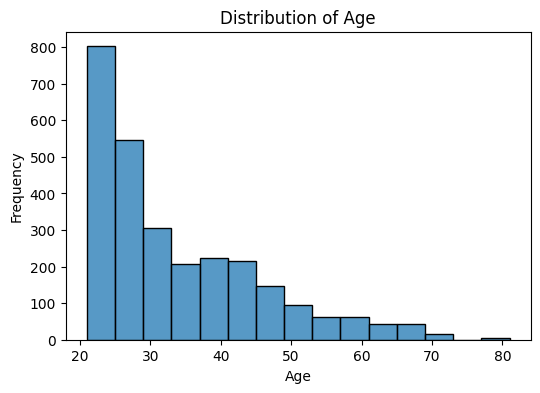

In [6]:
# Identify numeric columns, excluding 'Id' and 'Outcome'
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Remove 'ID' and 'Outcome' if they exist in the numeric columns
columns_to_remove = ['Id', 'Outcome']
for col in columns_to_remove:
    if col in numeric_columns:
        numeric_columns.remove(col)

# Print numeric columns after removing ID and Outcome for debugging
print("\nNumeric columns , after removing ID and Outcome:\n", numeric_columns)

# Create histograms for all numeric columns except ID and Outcome
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=15, kde=False)  # Add kde=True for kernel density estimation
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    #graphical representation of the distribution of a dataset:


#why we choose BMI and Glucose?:
#Glucose Levels are key indicators of diabetes severity and management, while BMI indicates body weight relative to height,
with higher BMI linked to increased risk of type 2 diabetes; exploring the relationship between these two variables can reveal patterns, 
such as higher BMIs being associated with higher glucose levels, providing insights into how body weight may influence 
glucose metabolism and diabetes likelihood.


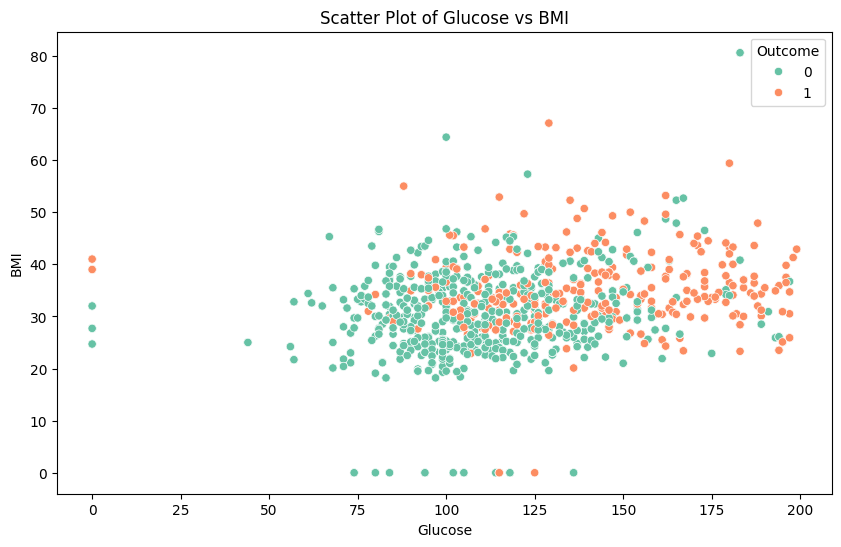

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome' ,palette='Set2' )
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()


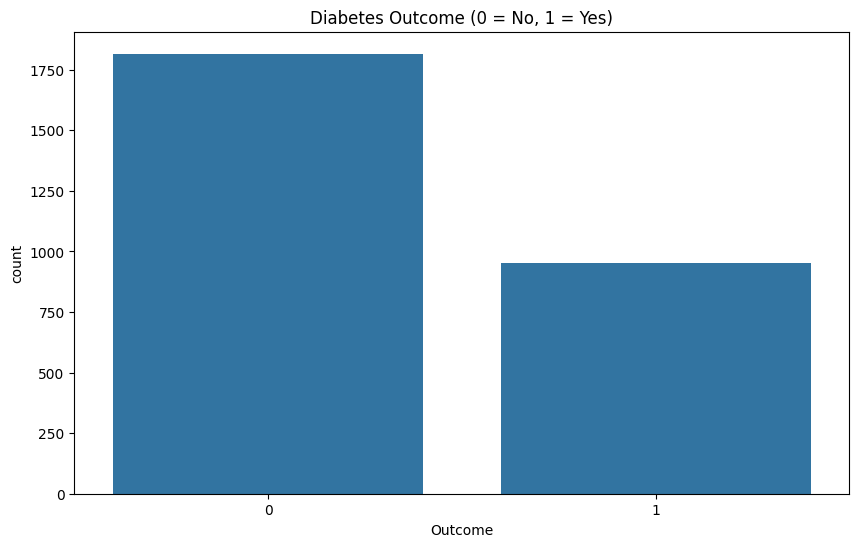

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome',data=df)

plt.title('Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()


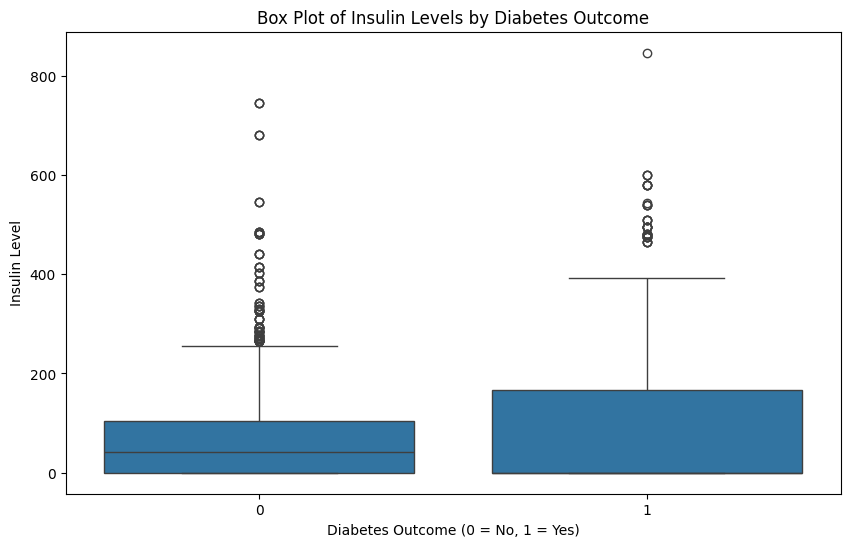

In [9]:
# Create a box plot for Insulin levels by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Box Plot of Insulin Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Insulin Level')
plt.show()
#why we choose insulin?:
#Insulin levels are crucial for understanding diabetes management. 
# Individuals with diabetes often have altered insulin production or sensitivity, making this variable significant for analysis.


Data Cleaning:

First, eliminating any duplicate rows, if any:
As shown below we didn't find any duplicated rows.

In [10]:
# Check for duplicates
duplicates = df.duplicated()
# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Second, filling out missing values:
As shown above there is no any Null values in our data set, but We believe that the zeros in some columns such as SkinThickness, Insulin and BMI are actually missing values ​​and have been filled with zeros; due to the fact that these values can not be 0 for any human. 
So we decided to treat these zeros in the mentioned columns as missing values and then replace it with the mean of the column.

In [11]:
# Specify the columns to modify
columns_to_modify = ['SkinThickness', 'Insulin', 'BMI']

# Calculate the mean for each column and replace 0s with the mean
for column in columns_to_modify:
    mean_value = df[column].replace(0, pd.NA).mean()  # Calculate mean excluding 0s
    df[column] = df[column].replace(0, mean_value)  # Replace 0s with the mean

# Print the modified DataFrame
print(df)

        Id  Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin  \
0        1            6      148             72      35.000000  154.23783   
1        2            1       85             66      29.000000  154.23783   
2        3            8      183             64      29.289634  154.23783   
3        4            1       89             66      23.000000   94.00000   
4        5            0      137             40      35.000000  168.00000   
...    ...          ...      ...            ...            ...        ...   
2763  2764            2       75             64      24.000000   55.00000   
2764  2765            8      179             72      42.000000  130.00000   
2765  2766            6       85             78      29.289634  154.23783   
2766  2767            0      129            110      46.000000  130.00000   
2767  2768            2       81             72      15.000000   76.00000   

       BMI  DiabetesPedigreeFunction  Age  Outcome  
0     33.6            

Third, detect and remove outliers:
Because our dataset is not normally distributed we found it more appropriate to use IQR (interquartile range) method which identifies outliers by calculating the range between the first quartile (Q1) and the third quartile (Q3), then we removed detected outliers.

In [16]:
#checking for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())
# Remove outliers
df_cleaned = df[~outliers]
# Print the cleaned dataset
print("Cleaned Dataset:")
print(df_cleaned)

Number of outliers: 1062
Cleaned Dataset:
        Id  Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin  \
0        1            6      148             72      35.000000  154.23783   
1        2            1       85             66      29.000000  154.23783   
2        3            8      183             64      29.289634  154.23783   
3        4            1       89             66      23.000000   94.00000   
5        6            5      116             74      29.289634  154.23783   
...    ...          ...      ...            ...            ...        ...   
2759  2760            6      102             82      29.289634  154.23783   
2760  2761            6      134             70      23.000000  130.00000   
2764  2765            8      179             72      42.000000  130.00000   
2765  2766            6       85             78      29.289634  154.23783   
2767  2768            2       81             72      15.000000   76.00000   

       BMI  DiabetesPedigreeFunct

Feature Selection:

First we've tried embedded method and we found that the result features are inaccurate so we tried the other methods.

In [12]:
#Embedded Method

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Features and target
x = df.drop(columns=['Id', 'Outcome']) 
y = df['Outcome']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Apply L1 Regularization (Lasso) for feature selection
model = Lasso(alpha=0.1)  
model.fit(x_train, y_train)

# Display the selected features
selected_features = x.columns[model.coef_ != 0]
print("Selected Features:", selected_features)




Selected Features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')


Second we've tried filter method and we found that the result features are inaccurate and irrelevant so we tried the other methods.

In [5]:
#feature selection by using filter method

import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#choosing all columns except the class label column and ID column
X = df.drop(columns=['Id', 'Outcome']) 
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#select the 3 best columns
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X_scaled, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


Third we've tried wrapper method and we found that the result features are inaccurate and irrelevant so we tried the other method

In [6]:
#feature selection by using wrapper method

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#choosing all columns except the class label column and ID column
X = df.drop(columns=['Id', 'Outcome'])  
y = df['Outcome']

#use RFE with logistic regression as underlying model
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=3)  
X_rfe = rfe.fit_transform(X_scaled, y)

#display selceted features
print("Selected Features:" , selected_feature_names)




Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


After we tried all previous methods we found that Hybrid method was the best method since its result was accurate and it combines filter and wrapper methods.

In [7]:
# Hybrid Method

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
# Features and target
X = df.drop(columns=['Id', 'Outcome']) 
y = df['Outcome']

# Step 1: Filter method (Chi-Square)
chi_selector = SelectKBest(chi2, k=4)  
X_kbest = chi_selector.fit_transform(X, y)

# Step 2: Wrapper method (Lasso)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=1)
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

# Display selected features
selected_features = X.columns[chi_selector.get_support()]
print("Selected Features:", selected_features)






Selected Features: Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


normlization:
Normalization was performed to ensure consistent data scale. The normalization technique applied is max-min normalization. This technique scales specific attribute values ​​to a specified range from 0 to 1. The following attributes were selected for normalization: {'BMI','Glucose','BloodPressure','SkinThickness','Insulin'}

In [3]:
#Extract Columns to normlize
columns_to_normalize = ['BMI','Glucose','BloodPressure','SkinThickness','Insulin']
data_to_normlize = df[columns_to_normalize]

#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normlized_data_minmax = minmax_scaler.fit_transform(data_to_normlize)

#Replace the normlized values in the original DataFrame
df[columns_to_normalize] = normlized_data_minmax

print("min-max scaled data:")

print(df)


min-max scaled data:
        Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0        1            6  0.743719       0.590164       0.318182  0.000000   
1        2            1  0.427136       0.540984       0.263636  0.000000   
2        3            8  0.919598       0.524590       0.000000  0.000000   
3        4            1  0.447236       0.540984       0.209091  0.111111   
4        5            0  0.688442       0.327869       0.318182  0.198582   
...    ...          ...       ...            ...            ...       ...   
2763  2764            2  0.376884       0.524590       0.218182  0.065012   
2764  2765            8  0.899497       0.590164       0.381818  0.153664   
2765  2766            6  0.427136       0.639344       0.000000  0.000000   
2766  2767            0  0.648241       0.901639       0.418182  0.153664   
2767  2768            2  0.407035       0.590164       0.136364  0.089835   

           BMI  DiabetesPedigreeFunction  Age  Outcome

discretization: we applied discretization to the "age" column to simplify the continuous age data by grouping it into meaningful age ranges, the ranges are [0-30 , 31-50 , 51-100] This helps reduce noise, improve interpretability, and may enhance model performance by capturing patterns more effectively in categories rather than treating age as a continuous variable.

In [3]:
#Discretization for column (Age)
columns_to_Discretize = 'Age'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df['AgeGroup'] = pd.cut(df[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df[['Age' ,'AgeGroup']]) 

original DataFrame:
      Age AgeGroup
0      50    31-50
1      31    31-50
2      32    31-50
3      21     0-30
4      33    31-50
...   ...      ...
2763   33    31-50
2764   36    31-50
2765   42    31-50
2766   26     0-30
2767   25     0-30

[2768 rows x 2 columns]
